In [1]:
# Array and data functions
from glob import glob
import numpy as np
import pandas as pd

# Plotting
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
import seaborn as sns

from MEDUSSA.measure import SizeDataFrame

In [6]:
masks_softworx = sorted(glob('/Users/reyesmatte/Desktop/Imaging_paper/Fig3/Deconvolution_measurements/SoftWorx/*.tif'))

masks_FM2FM = sorted(glob('/Users/reyesmatte/Desktop/Imaging_paper/Fig3/Deconvolution_measurements/FM2FM/*.tif'))

masks_FP2FM = sorted(glob('/Users/reyesmatte/Desktop/Imaging_paper/Fig3/Deconvolution_measurements/FP2FM/*.tif'))


assert len(masks_softworx) == len(masks_FM2FM)
assert len(masks_softworx) == len(masks_FP2FM)

print(len(masks_softworx))

20


In [7]:
all_masks = [masks_softworx,masks_FM2FM,masks_FP2FM]

methods = ['SoftWorx','FM2FM','FP2FM']

dfs = [SizeDataFrame(masks) for masks in all_masks]

for df,method in zip(dfs,methods):
    df.insert(0,'Method',method)

In [8]:
dfs = pd.concat(dfs,ignore_index=True)

dfs = dfs[dfs['Width'] > 0.3]
dfs = dfs[dfs['Width'] < 1.5]

softworx = dfs[dfs['Method'] == 'SoftWorx']
FM2FM = dfs[dfs['Method'] == 'FM2FM']
FP2FM = dfs[dfs['Method'] == 'FP2FM']

print(len(softworx),len(FM2FM),len(FP2FM))

1056 1127 1085


In [9]:
L_t,w_t,S_t,V_t = np.array(softworx['Length']),np.array(softworx['Width']),np.array(softworx['SurfaceArea']),np.array(softworx['Volume'])
L_fm,w_fm,S_fm,V_fm = np.array(FM2FM['Length']),np.array(FM2FM['Width']),np.array(FM2FM['SurfaceArea']),np.array(FM2FM['Volume'])
L_fp,w_fp,S_fp,V_fp = np.array(FP2FM['Length']),np.array(FP2FM['Width']),np.array(FP2FM['SurfaceArea']),np.array(FP2FM['Volume'])

In [10]:
print(f'{np.median(L_t):.2f} ± {np.std(L_t):.2f}, {np.median(L_fm):.2f} ± {np.std(L_fm):.2f}, {np.median(L_fp):.2f} ± {np.std(L_fp):.2f}')
print(f'{np.median(w_t):.2f} ± {np.std(w_t):.2f}, {np.median(w_fm):.2f} ± {np.std(w_fm):.2f}, {np.median(w_fp):.2f} ± {np.std(w_fp):.2f}')
print(f'{np.median(S_t):.2f} ± {np.std(S_t):.2f}, {np.median(S_fm):.2f} ± {np.std(S_fm):.2f}, {np.median(S_fp):.2f} ± {np.std(S_fp):.2f}')
print(f'{np.median(V_t):.2f} ± {np.std(V_t):.2f}, {np.median(V_fm):.2f} ± {np.std(V_fm):.2f}, {np.median(V_fp):.2f} ± {np.std(V_fp):.2f}')
print(f'{np.median(S_t/V_t):.2f} ± {np.std(S_t/V_t):.2f}, {np.median(S_fm/V_fm):.2f} ± {np.std(S_fm/V_fm):.2f}, {np.median(S_fp/V_fp):.2f} ± {np.std(S_fp/V_fp):.2f}')

5.22 ± 2.18, 5.27 ± 2.23, 5.40 ± 2.26
0.84 ± 0.10, 0.84 ± 0.10, 0.84 ± 0.08
11.79 ± 4.65, 11.86 ± 4.54, 12.30 ± 4.74
2.37 ± 1.05, 2.37 ± 1.01, 2.47 ± 1.03
4.99 ± 0.96, 5.05 ± 0.88, 5.02 ± 0.81


/var/folders/q6/szs86xgn755_g81_n0cyblxc0000gp/T/ipykernel_41859/3428994849.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0,0].set_xticklabels(methods,fontsize=17)
/var/folders/q6/szs86xgn755_g81_n0cyblxc0000gp/T/ipykernel_41859/3428994849.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0,0].set_yticklabels(ax[0,0].get_yticklabels(),fontsize=12.5)
/var/folders/q6/szs86xgn755_g81_n0cyblxc0000gp/T/ipykernel_41859/3428994849.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0,1].set_xticklabels(methods,fontsize=17)
/var/folders/q6/szs86xgn755_g81_n0cyblxc0000gp/T/ipykernel_41859/3428994849.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocat

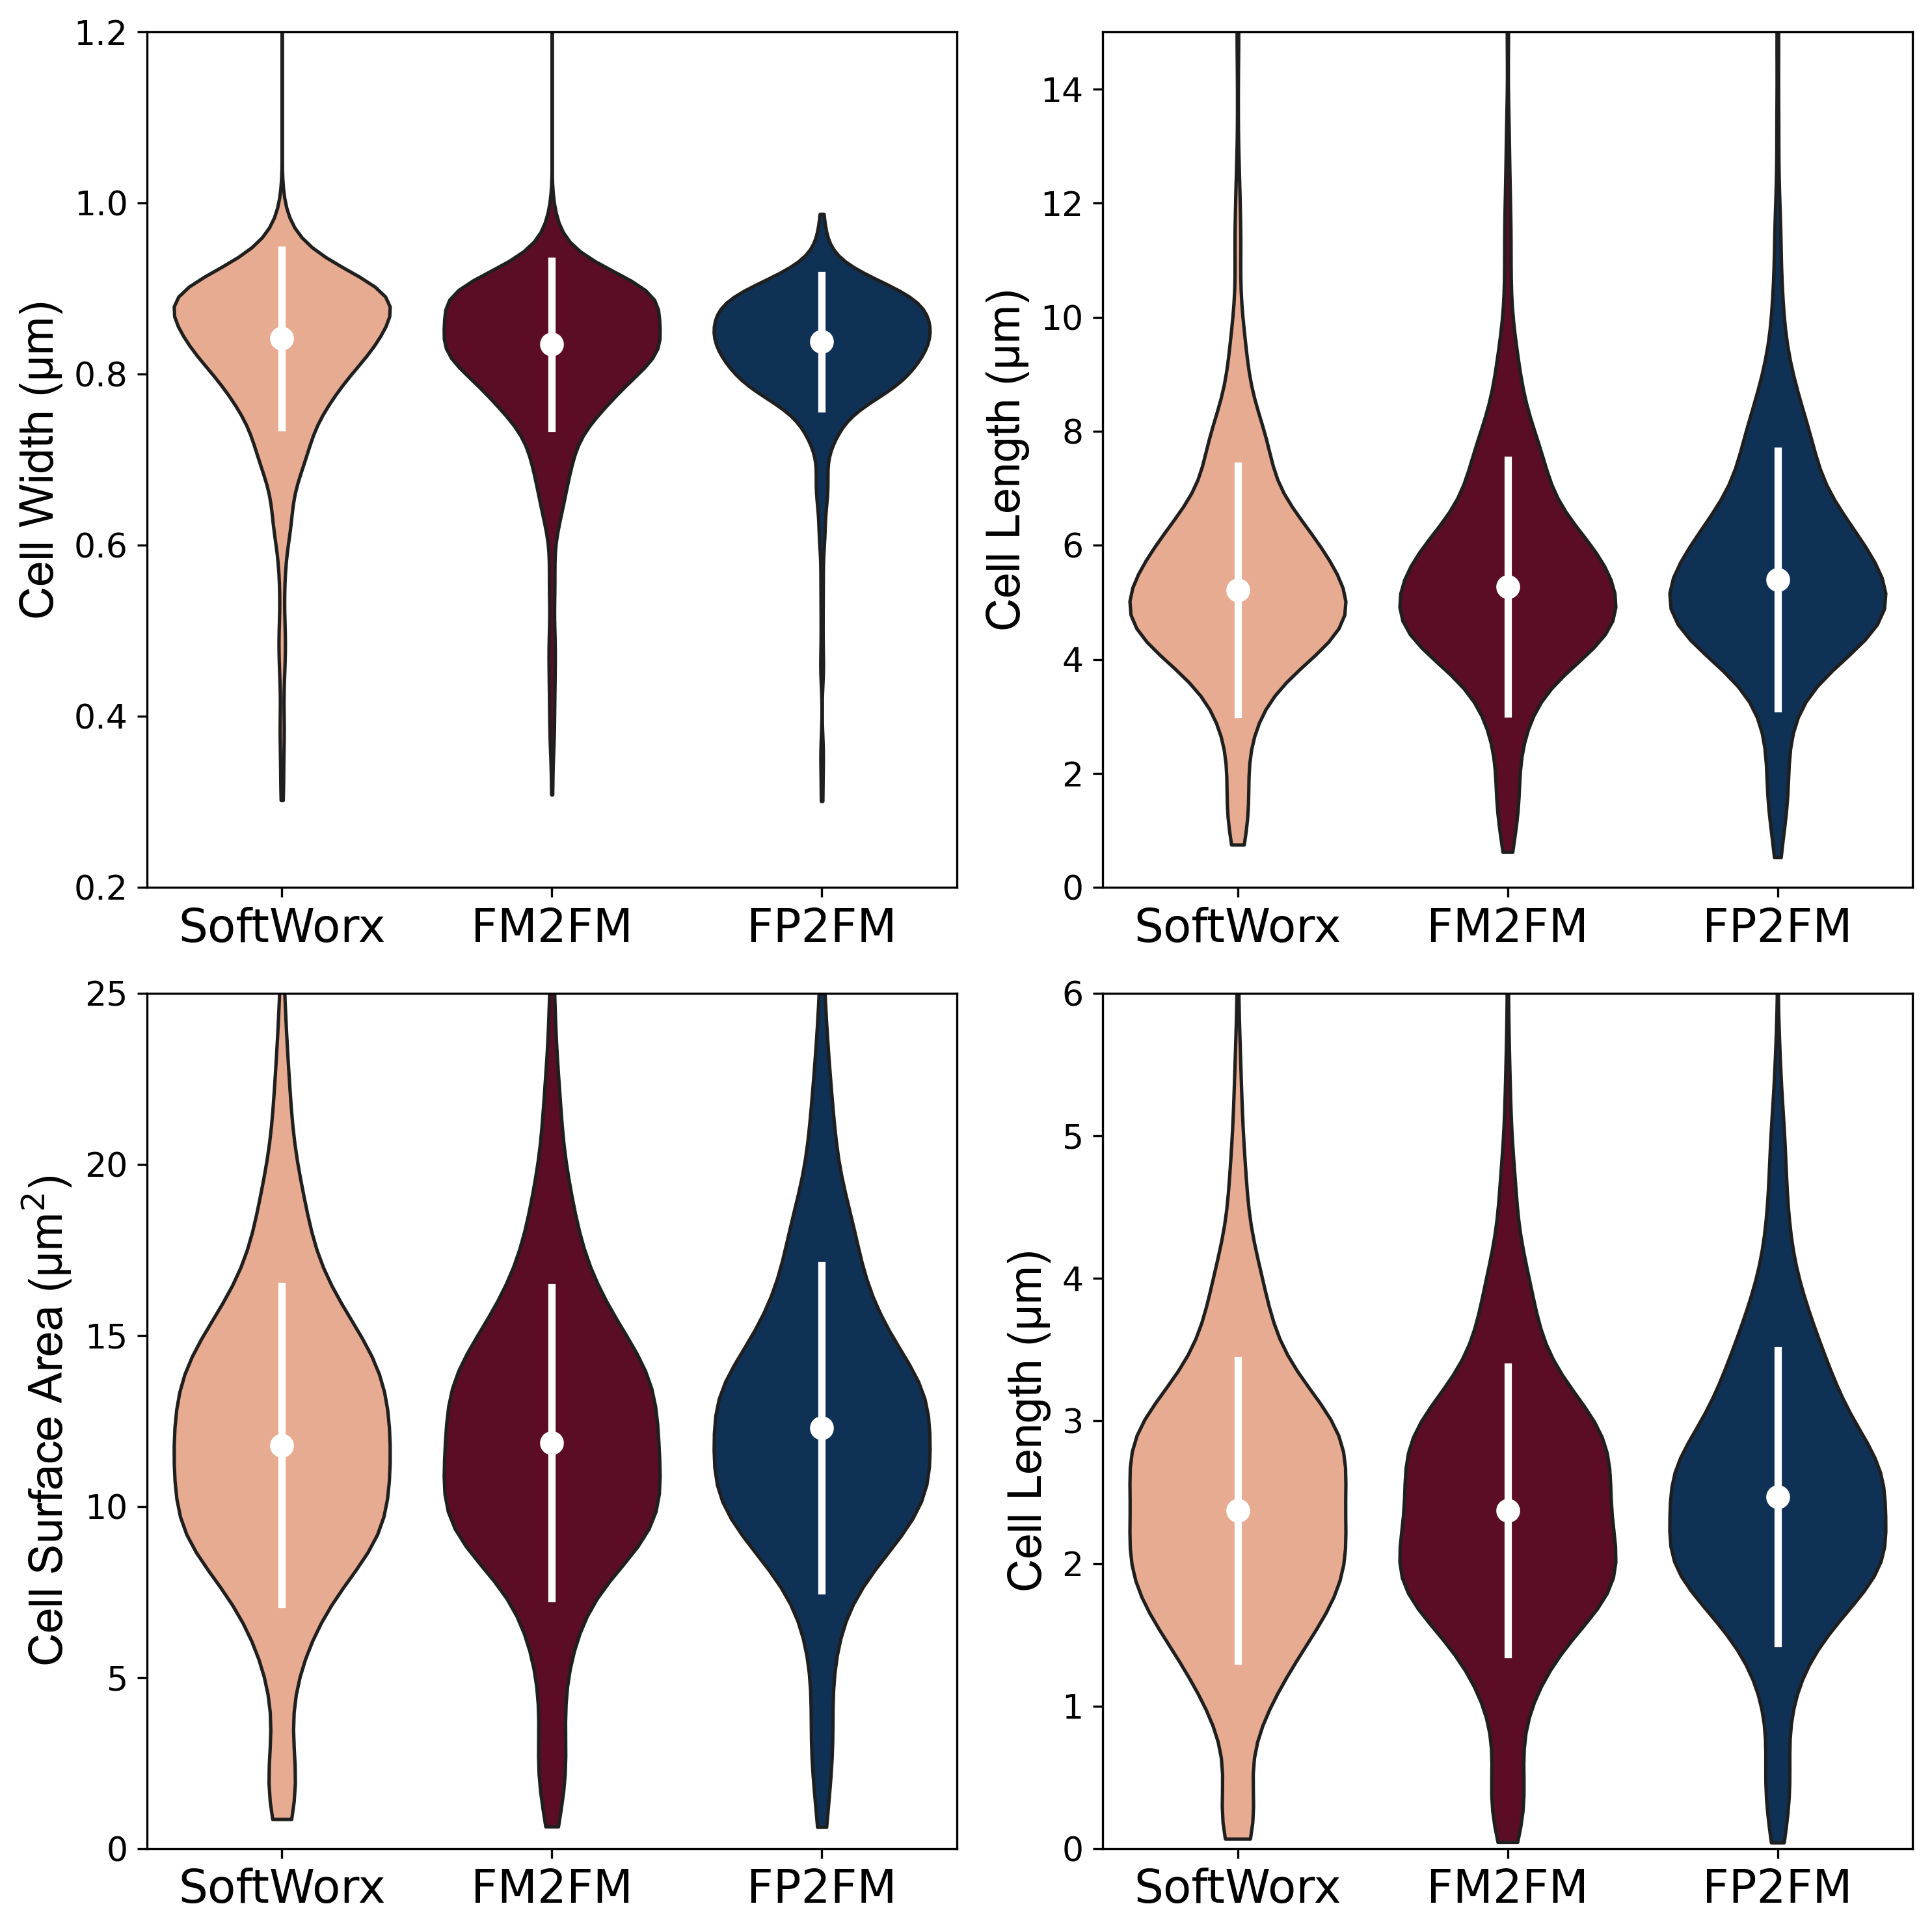

In [11]:
colors = ['#f4a582','#67001f','#053061']

fig,ax = plt.subplots(dpi=300,figsize=(10,10),ncols=2,nrows=2)

sns.violinplot(data=dfs,x='Method',y='Width',hue='Method',cut=0,inner=None,palette=colors,ax=ax[0,0],order=methods,density_norm='area')
sns.pointplot(data=dfs,x='Method',y='Width',ax=ax[0,0],linestyle='none',color='w',errorbar='sd',estimator='median',order=methods)
ax[0,0].set_ylim(0.2,1.2)
ax[0,0].set_xticklabels(methods,fontsize=17)
ax[0,0].set_ylabel('Cell Width (µm)',fontname='Arial',fontsize=17)
ax[0,0].set_yticklabels(ax[0,0].get_yticklabels(),fontsize=12.5)
ax[0,0].set_xlabel('')

sns.violinplot(data=dfs,x='Method',y='Length',hue='Method',cut=0,inner=None,palette=colors,ax=ax[0,1],order=methods,density_norm='area')
sns.pointplot(data=dfs,x='Method',y='Length',ax=ax[0,1],linestyle='none',color='w',errorbar='sd',estimator='median',order=methods)
ax[0,1].set_ylim(0,15)
ax[0,1].set_xticklabels(methods,fontsize=17)
ax[0,1].set_ylabel('Cell Length (µm)',fontname='Arial',fontsize=17)
ax[0,1].set_yticklabels(ax[0,1].get_yticklabels(),fontsize=12.5)
ax[0,1].set_xlabel('')

sns.violinplot(data=dfs,x='Method',y='SurfaceArea',hue='Method',cut=0,inner=None,palette=colors,ax=ax[1,0],order=methods,density_norm='area')
sns.pointplot(data=dfs,x='Method',y='SurfaceArea',ax=ax[1,0],linestyle='none',color='w',errorbar='sd',estimator='median',order=methods)
ax[1,0].set_ylim(0,25)
ax[1,0].set_xticklabels(methods,fontsize=17)
ax[1,0].set_ylabel('Cell Surface Area (µm$^2$)',fontname='Arial',fontsize=17)
ax[1,0].set_yticklabels(ax[1,0].get_yticklabels(),fontsize=12.5)
ax[1,0].set_xlabel('')

sns.violinplot(data=dfs,x='Method',y='Volume',hue='Method',cut=0,inner=None,palette=colors,ax=ax[1,1],order=methods,density_norm='area')
sns.pointplot(data=dfs,x='Method',y='Volume',ax=ax[1,1],linestyle='none',color='w',errorbar='sd',estimator='median',order=methods)
ax[1,1].set_ylim(0,6)
ax[1,1].set_xticklabels(methods,fontsize=17)
ax[1,1].set_ylabel('Cell Length (µm)',fontname='Arial',fontsize=17)
ax[1,1].set_yticklabels(ax[1,1].get_yticklabels(),fontsize=12.5)
ax[1,1].set_xlabel('')

fig.tight_layout()
fig.savefig('/Users/reyesmatte/Desktop/Imaging_paper/Fig3/Deconvolution_size_distributions.png')